In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# I/O
main = pd.read_csv(os.path.join(os.getcwd(), 'input/main.csv'))

out = os.path.join(os.getcwd(), 'output/UMAP_cluster_highlights')
if not os.path.exists(out):
    os.makedirs(out)

seg cluster 0


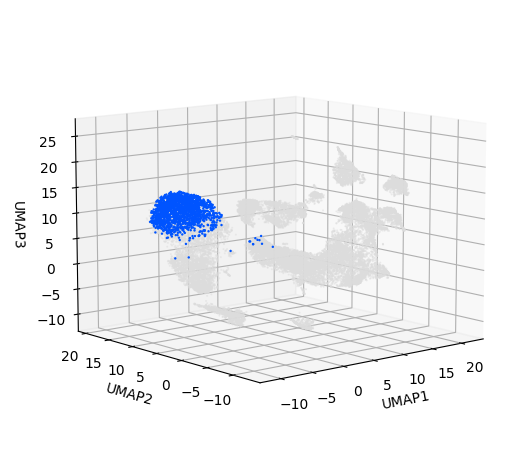

seg cluster 1


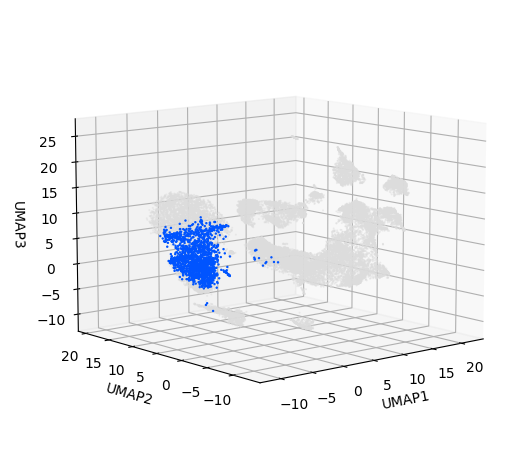

seg cluster 2


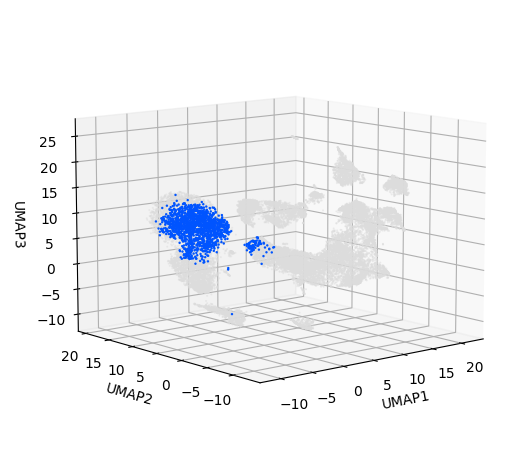

seg cluster 3


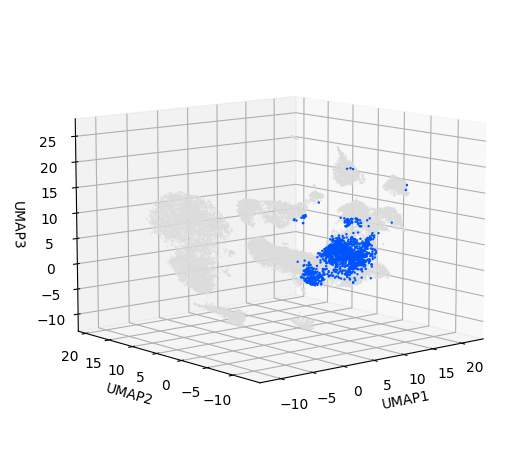

seg cluster 4


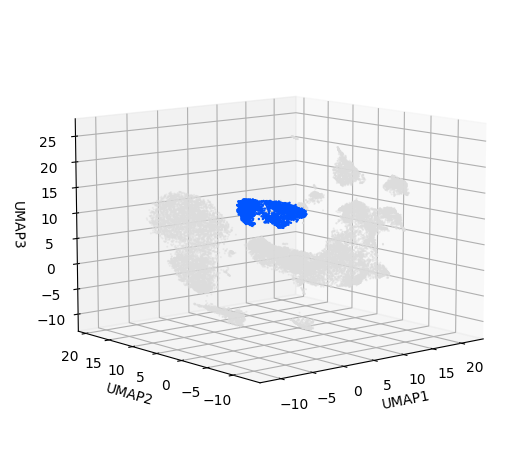

seg cluster 5


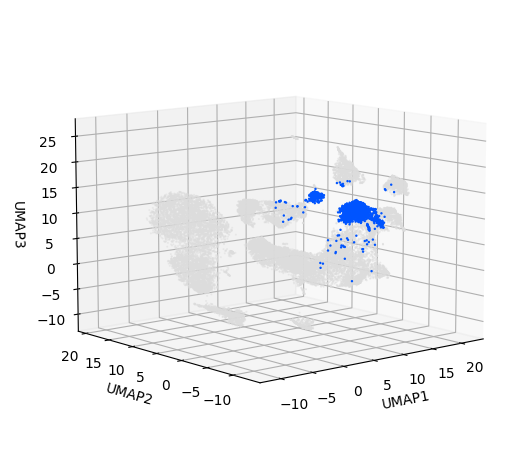

seg cluster 6


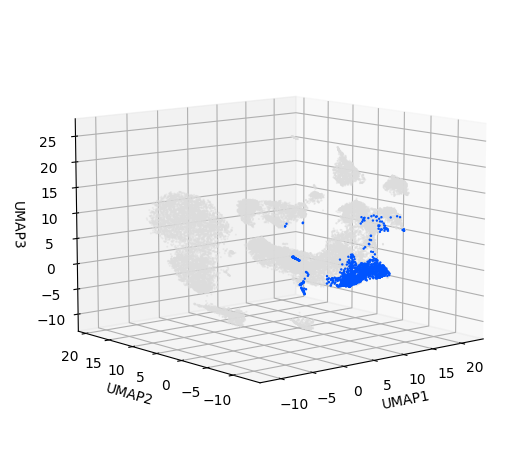

seg cluster 7


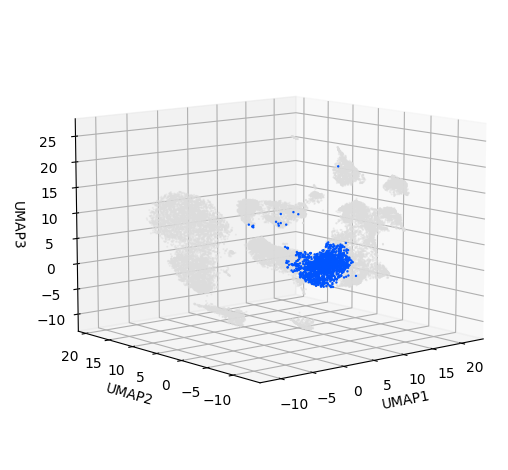

seg cluster 8


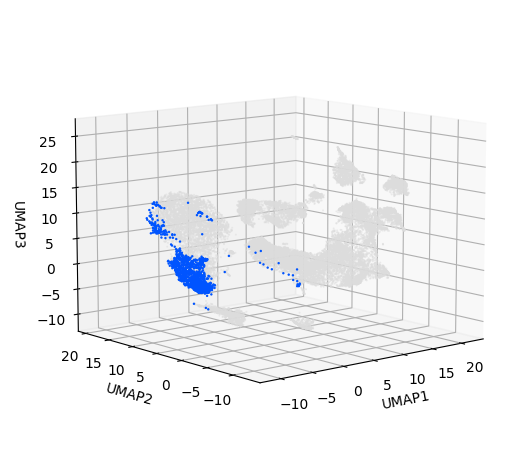

seg cluster 9


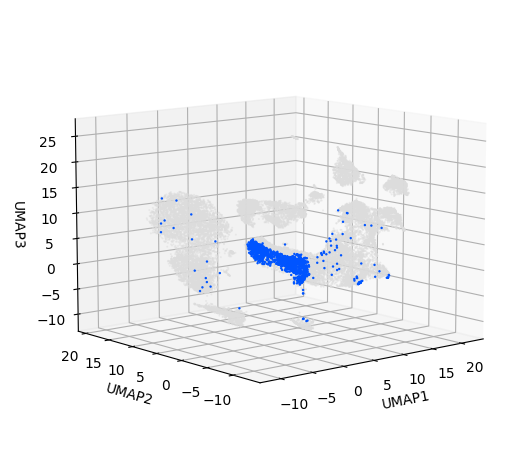

seg cluster 10


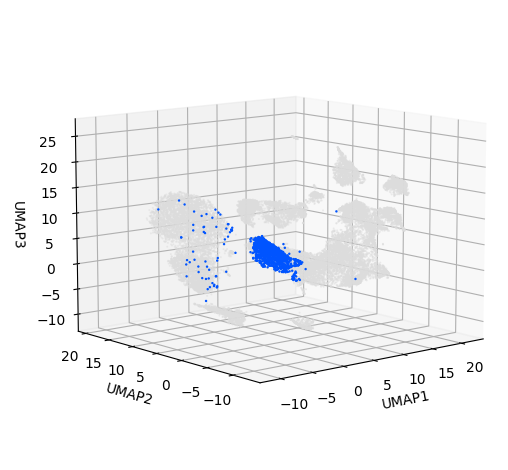

seg cluster 11


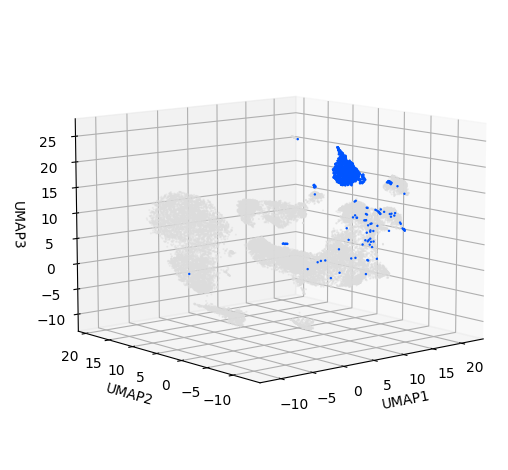

seg cluster 12


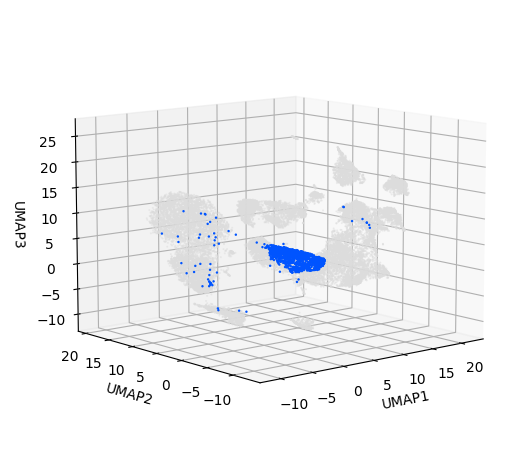

seg cluster 13


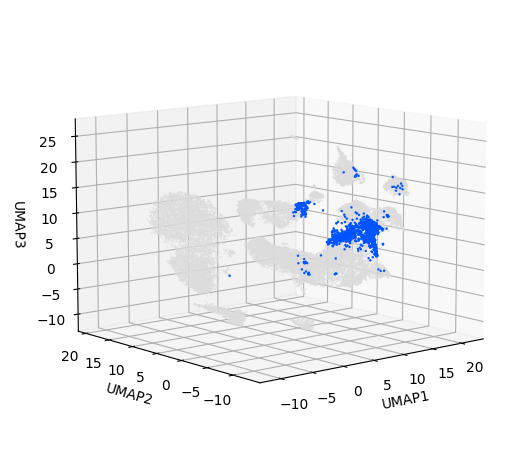

seg cluster 14


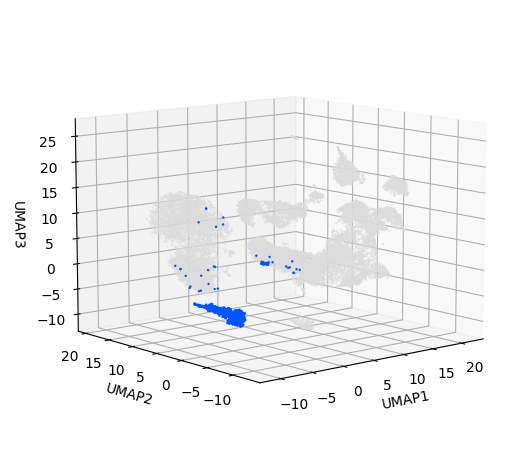

seg cluster 15


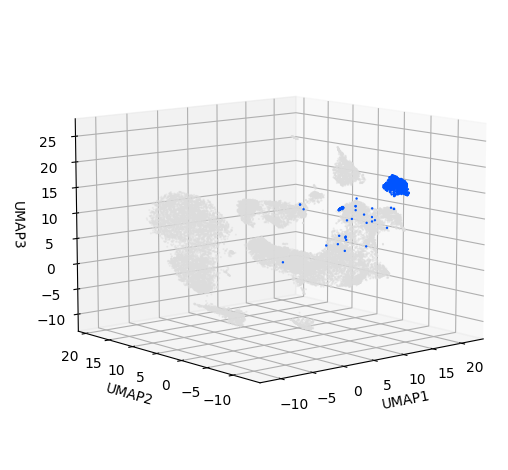

seg cluster 16


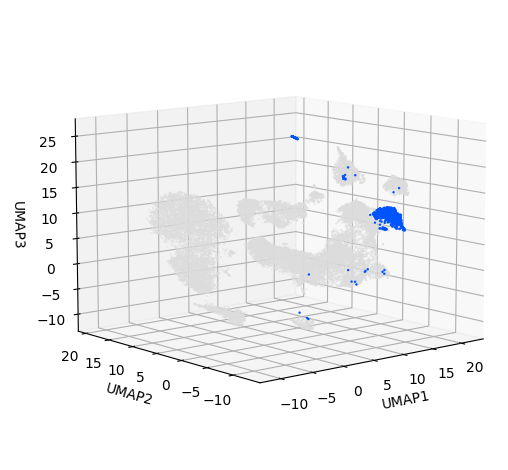

seg cluster 17


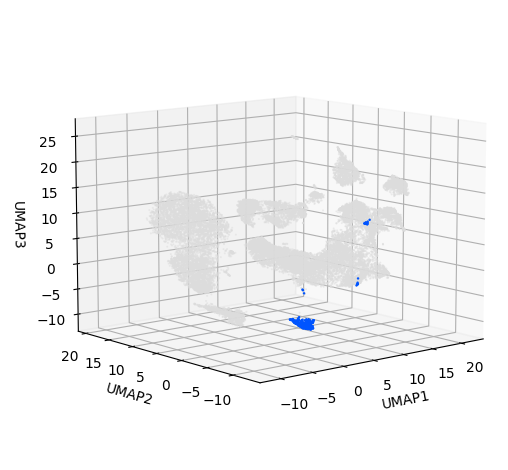

seg cluster 18


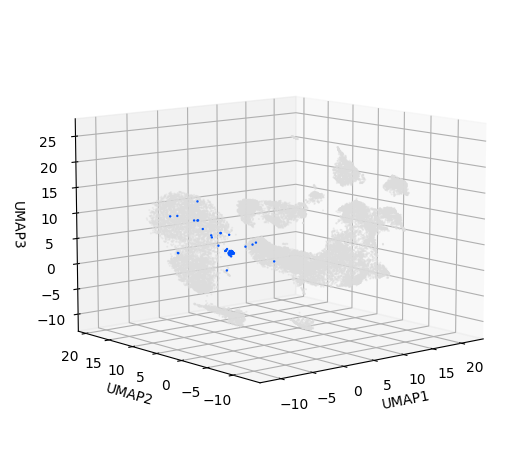

vae9 cluster 0


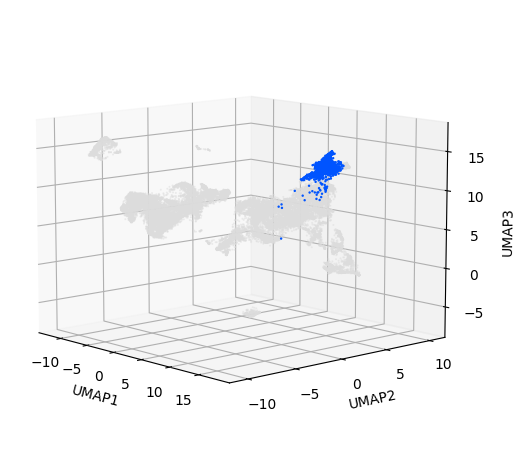

vae9 cluster 1


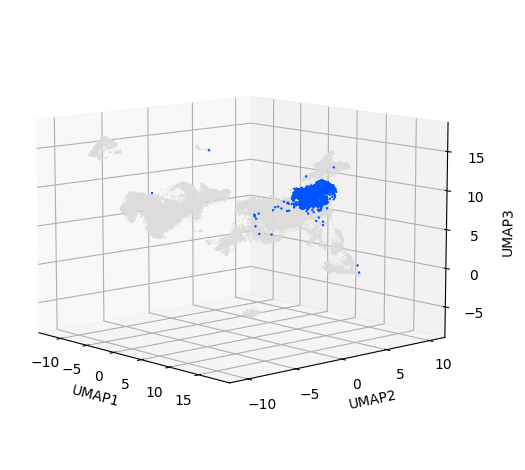

vae9 cluster 2


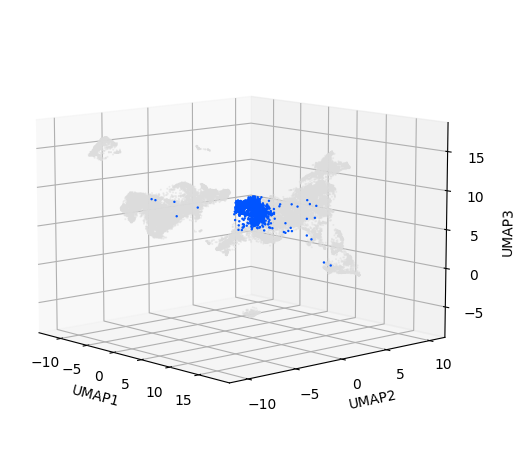

vae9 cluster 3


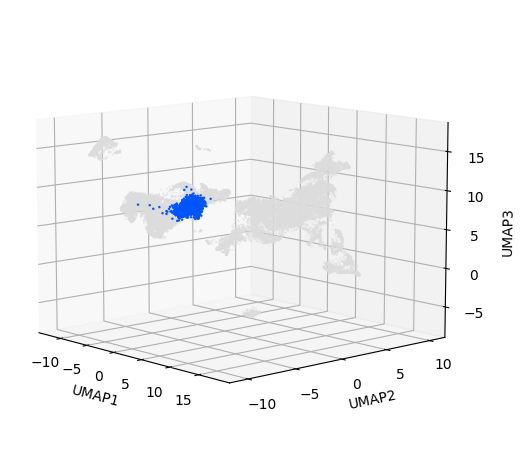

vae9 cluster 4


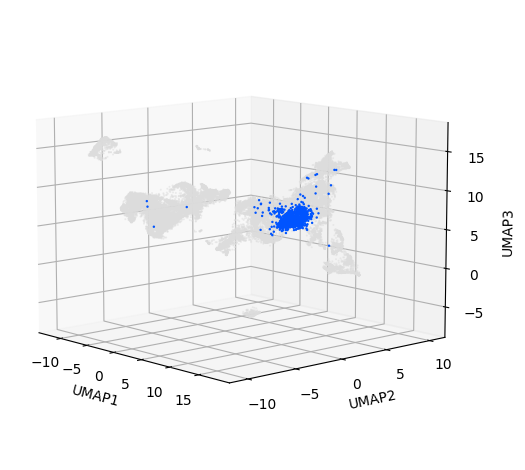

vae9 cluster 5


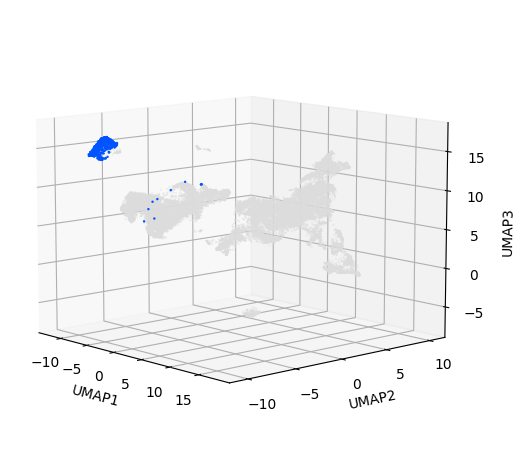

vae9 cluster 6


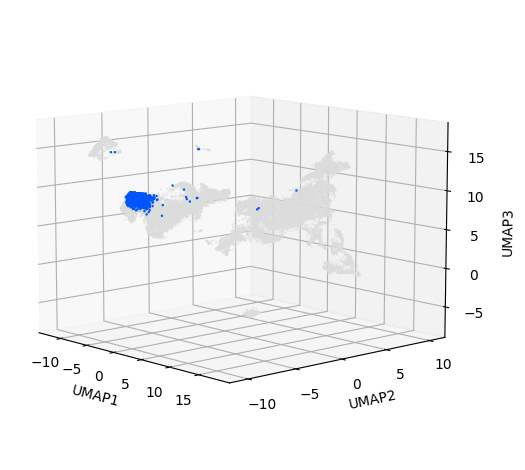

vae9 cluster 7


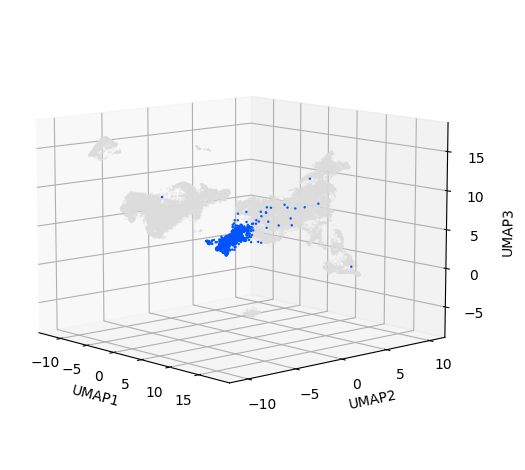

vae9 cluster 8


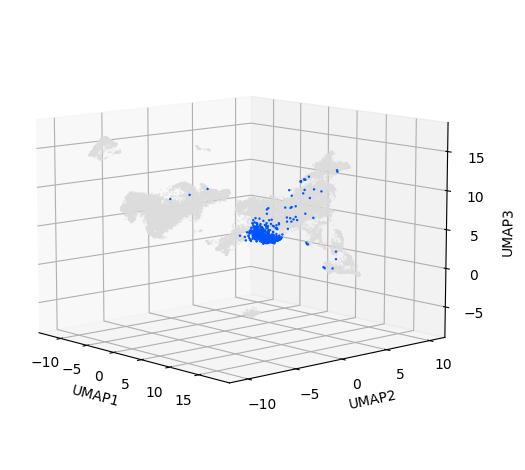

vae9 cluster 9


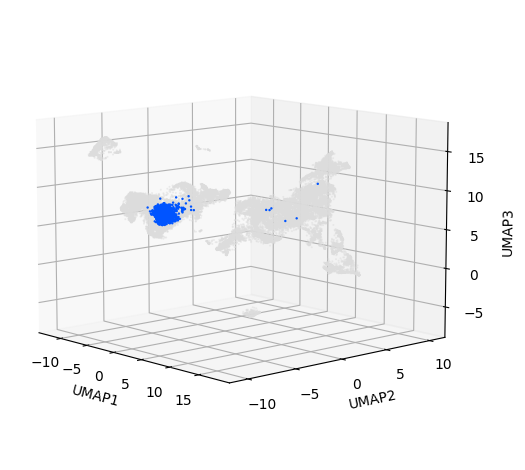

vae9 cluster 10


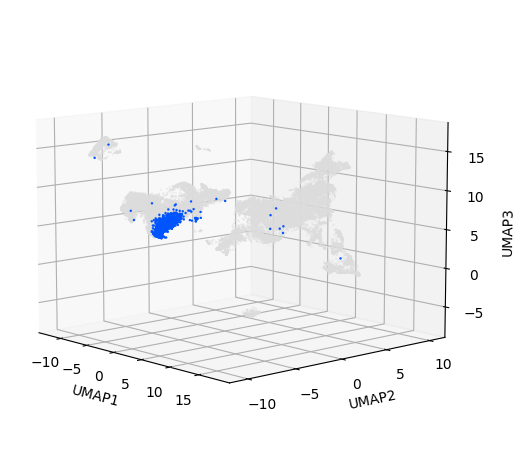

vae9 cluster 11


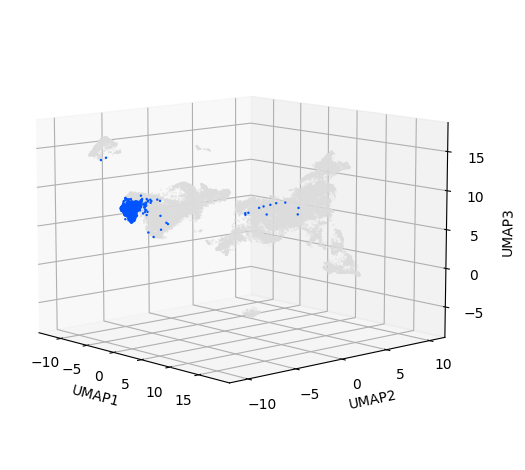

vae9 cluster 12


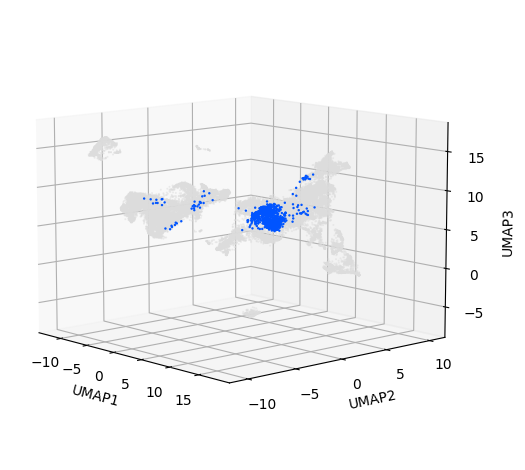

vae9 cluster 13


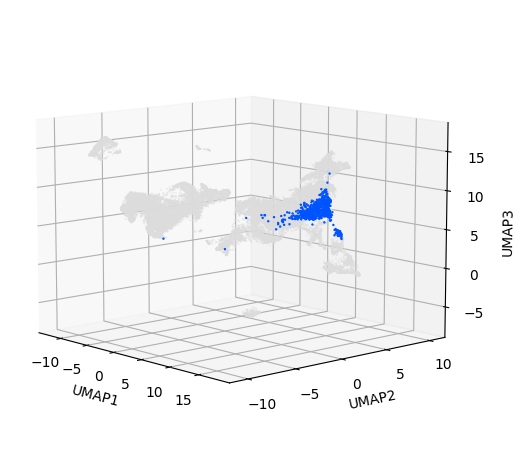

vae9 cluster 14


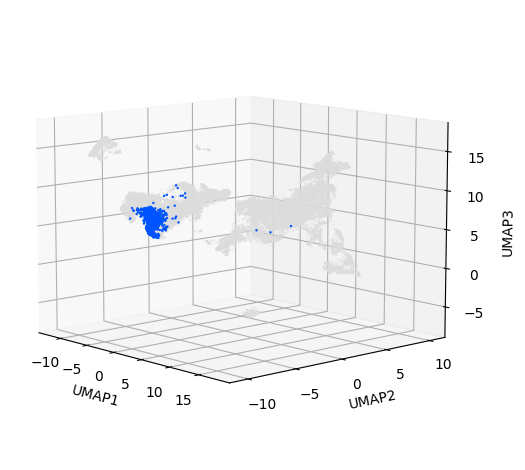

vae9 cluster 15


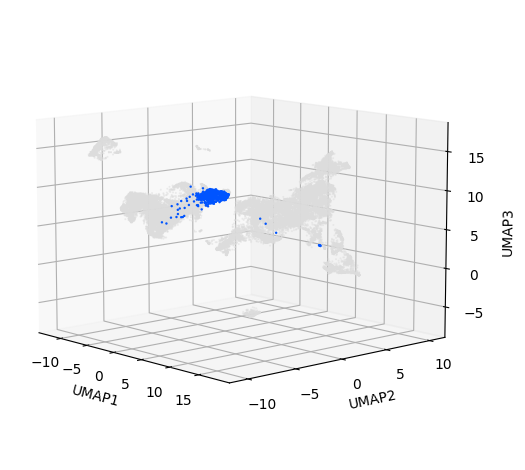

vae9 cluster 16


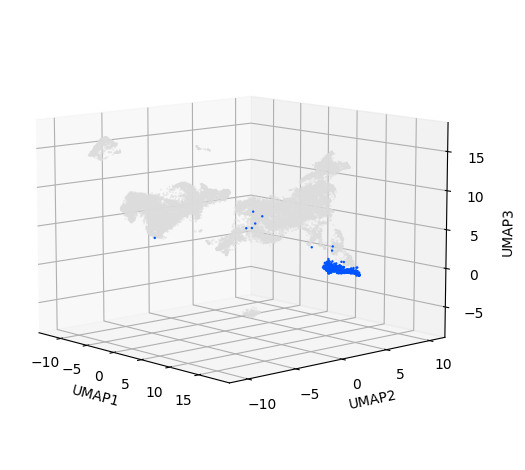

vae9 cluster 17


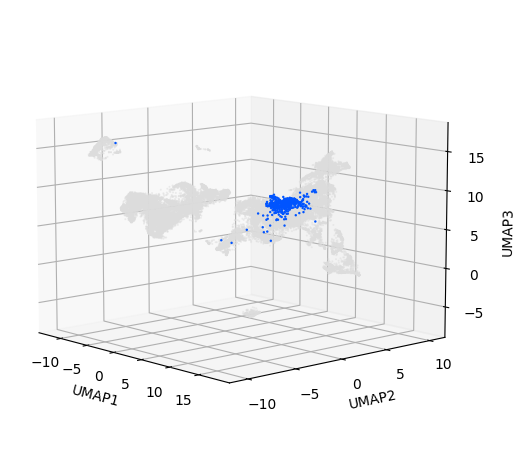

vae9 cluster 18


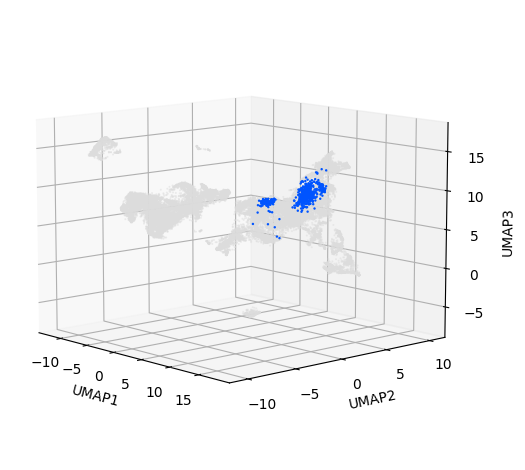

vae9 cluster 19


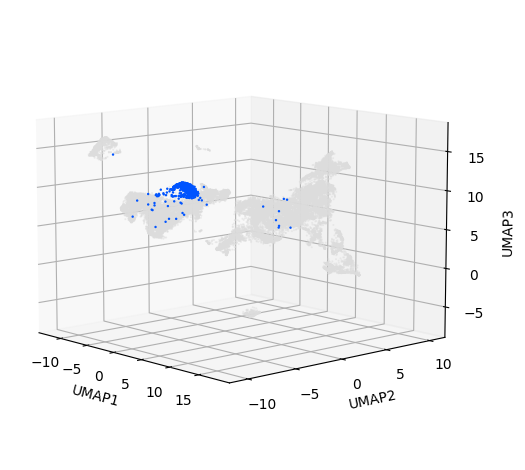

vae9 cluster 20


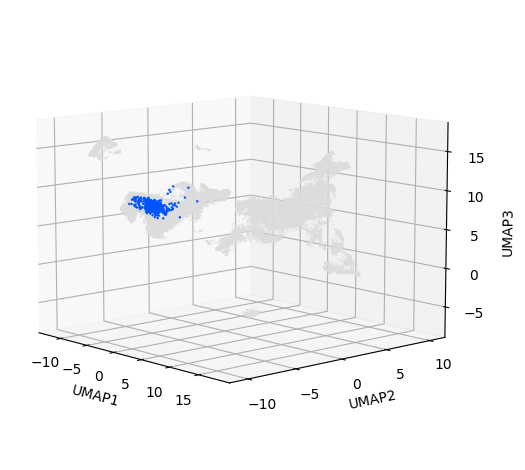

vae9 cluster 21


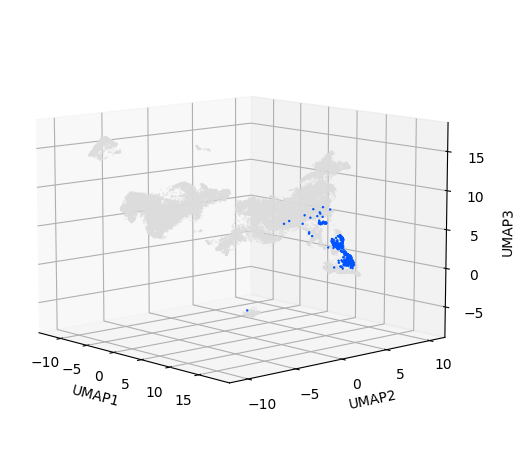

vae9 cluster 22


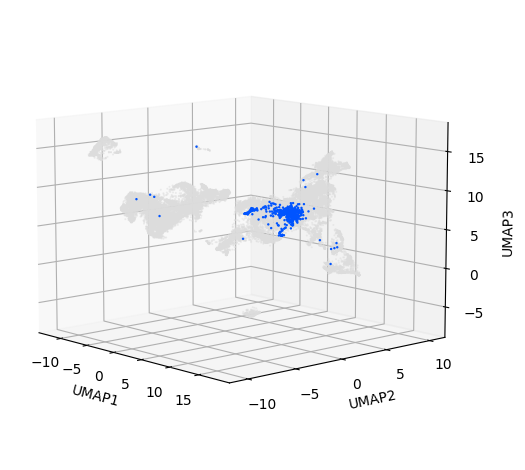

vae9 cluster 23


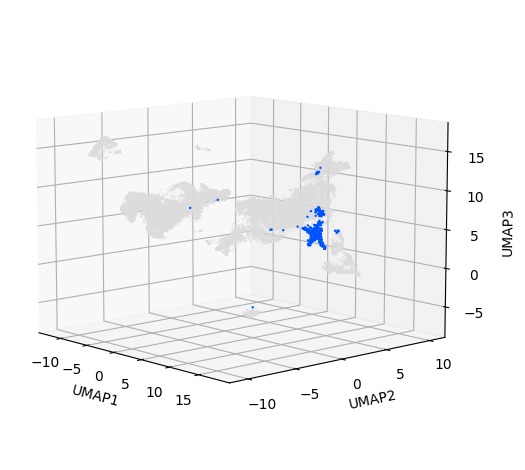

vae9 cluster 24


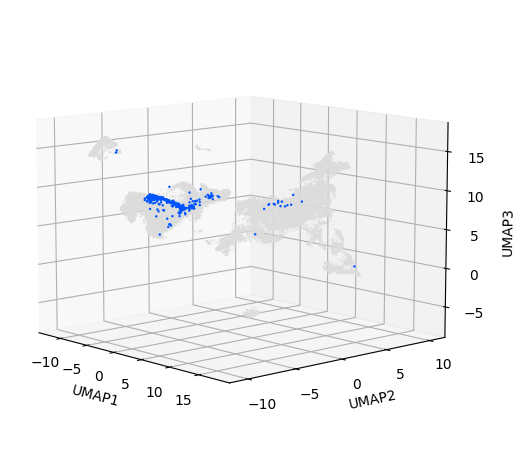

vae9 cluster 25


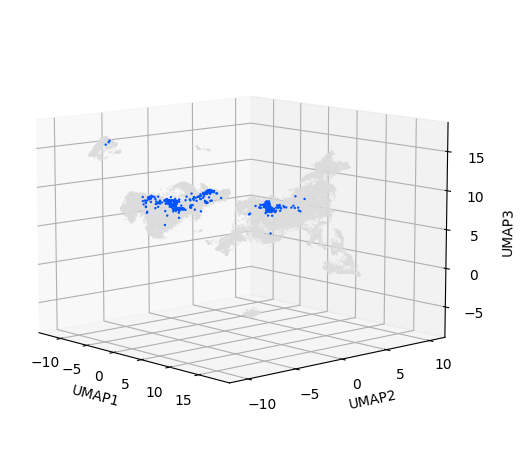

vae9 cluster 26


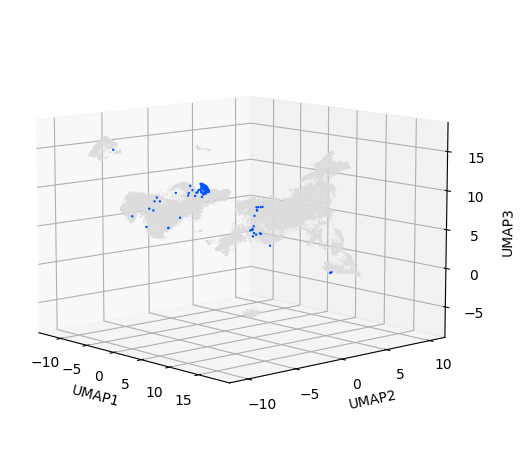

vae9 cluster 27


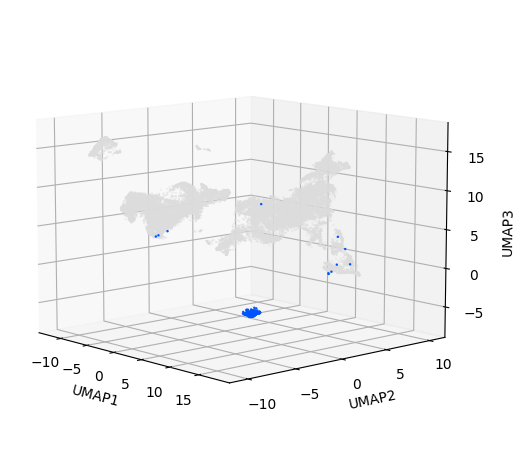

vae9 cluster 28


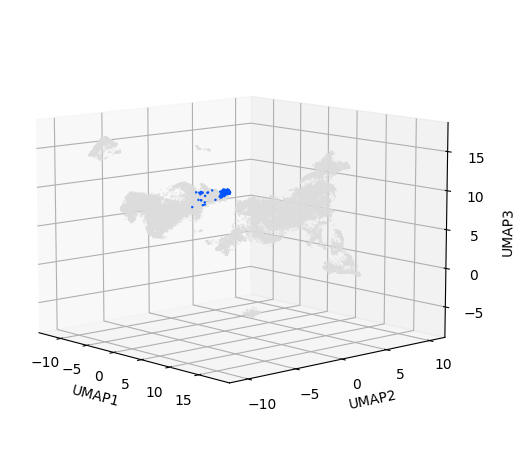

vae9 cluster 29


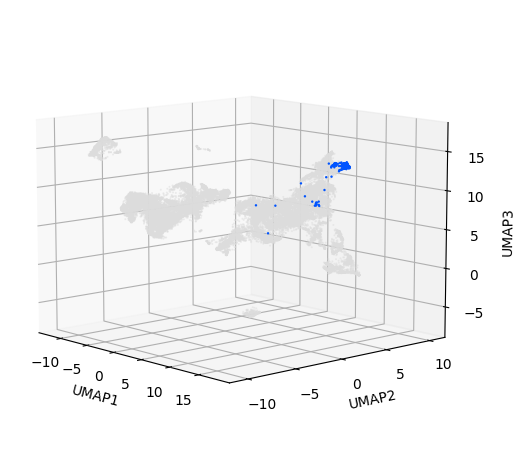

vae9 cluster 30


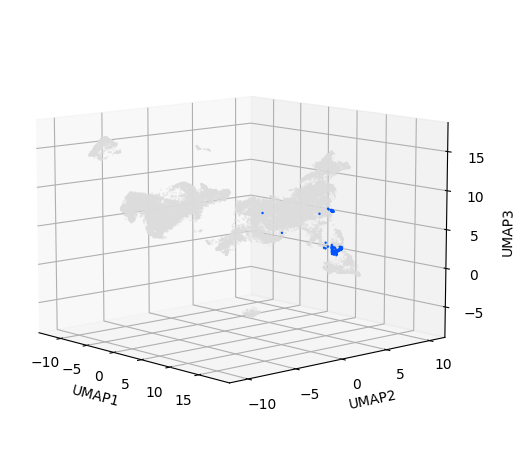

vae9 cluster 31


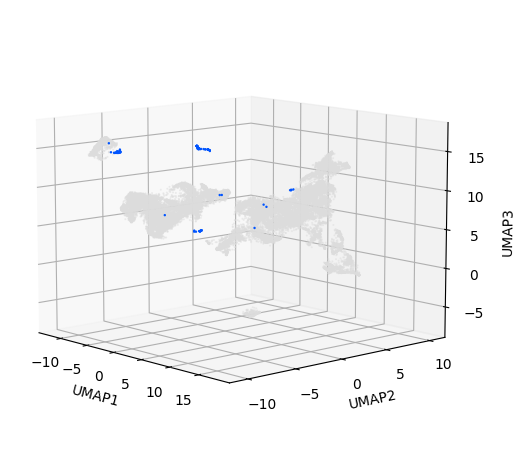

vae20 cluster 0


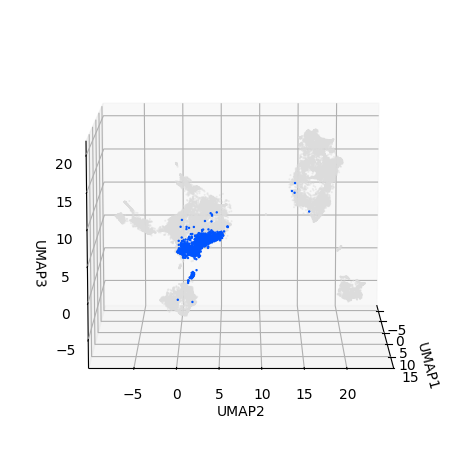

vae20 cluster 1


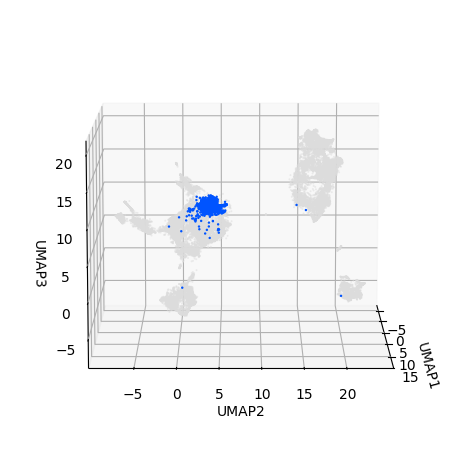

vae20 cluster 2


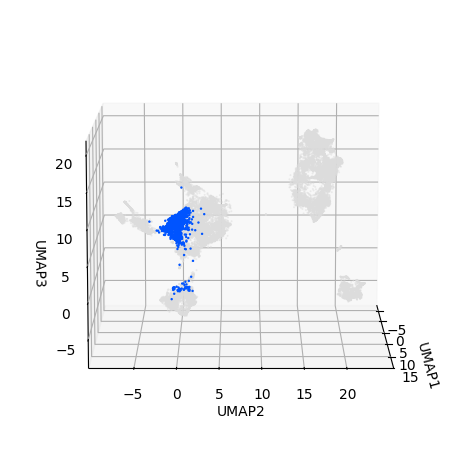

vae20 cluster 3


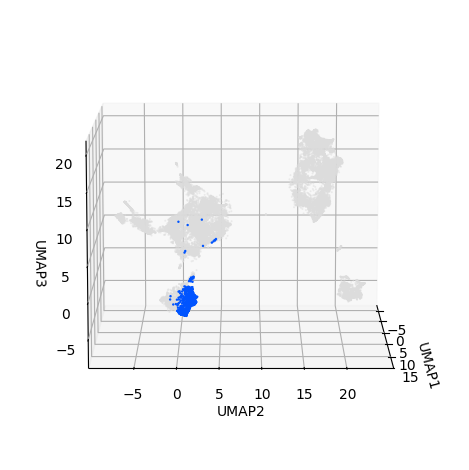

vae20 cluster 4


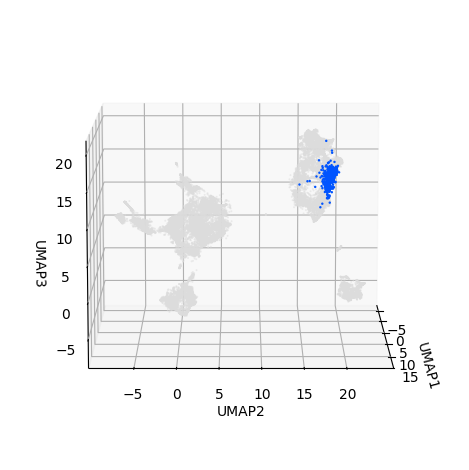

vae20 cluster 5


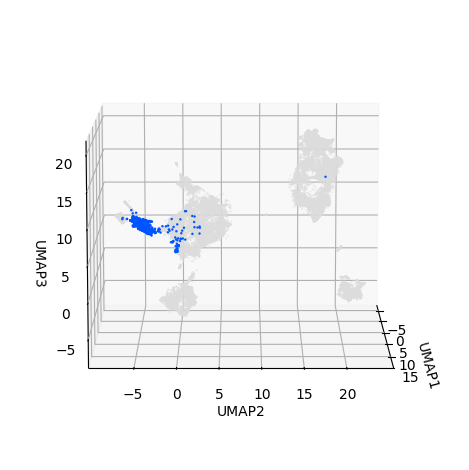

vae20 cluster 6


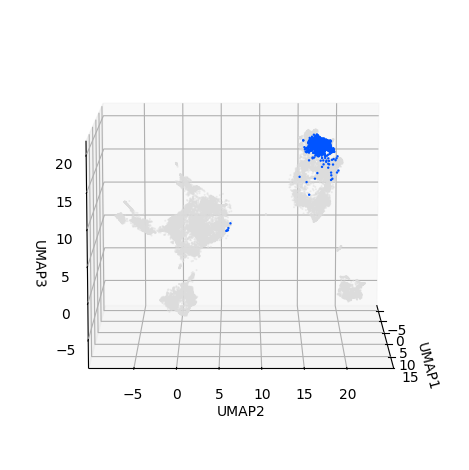

vae20 cluster 7


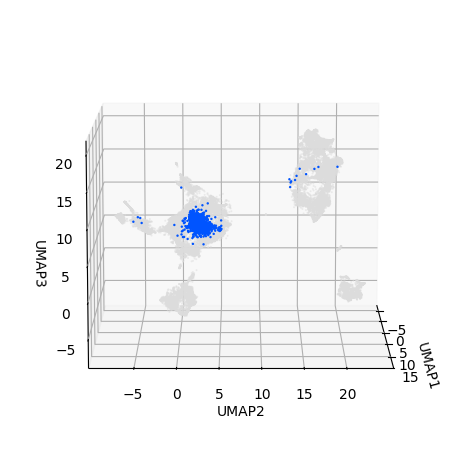

vae20 cluster 8


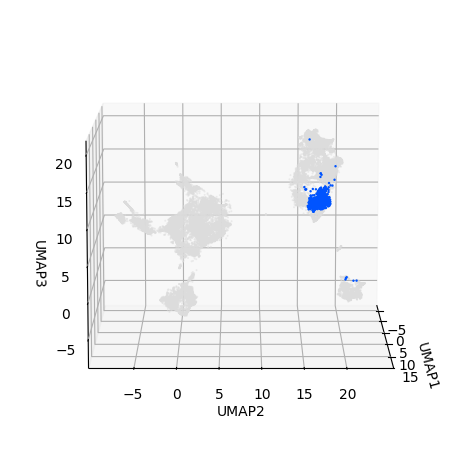

vae20 cluster 9


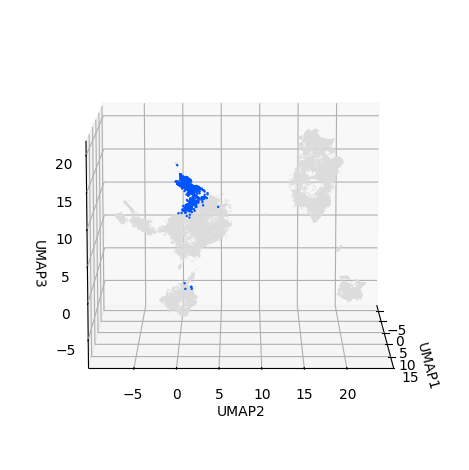

vae20 cluster 10


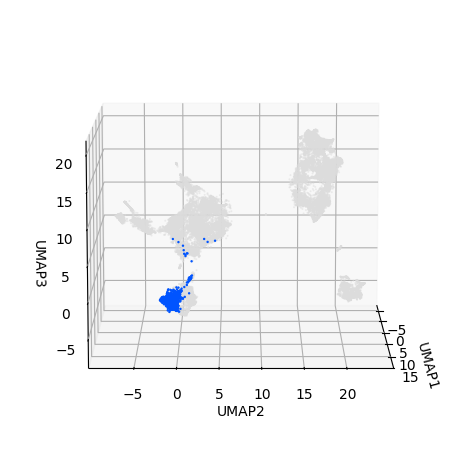

vae20 cluster 11


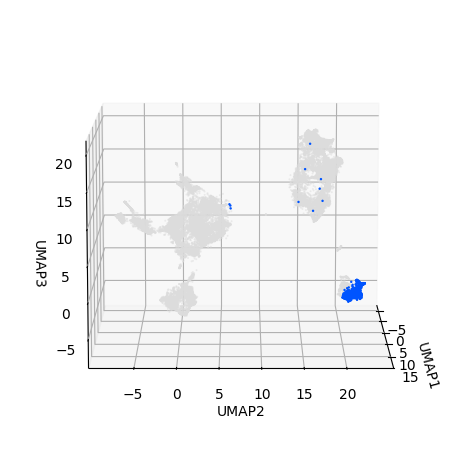

vae20 cluster 12


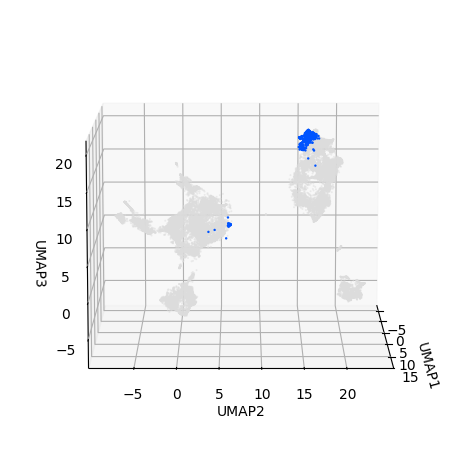

vae20 cluster 13


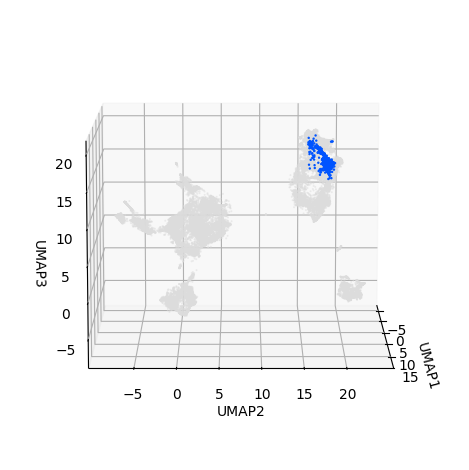

vae20 cluster 14


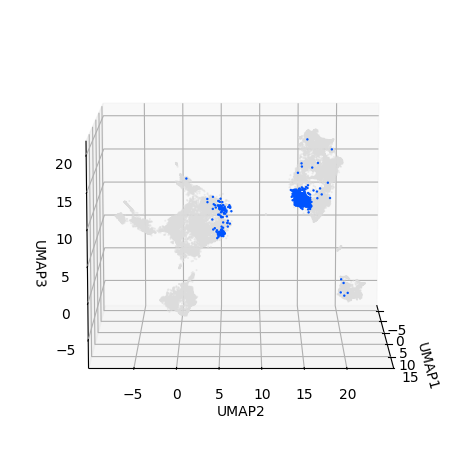

vae20 cluster 15


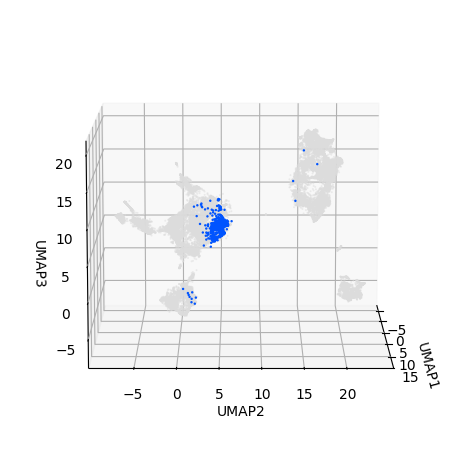

vae20 cluster 16


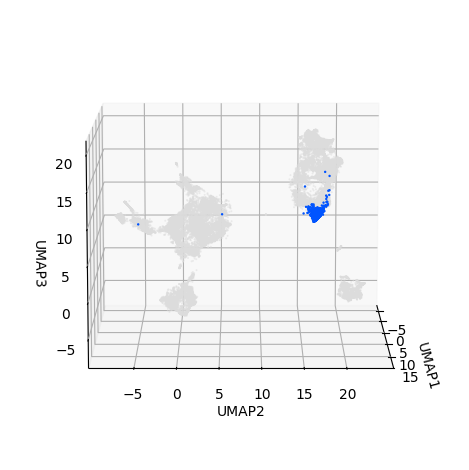

vae20 cluster 17


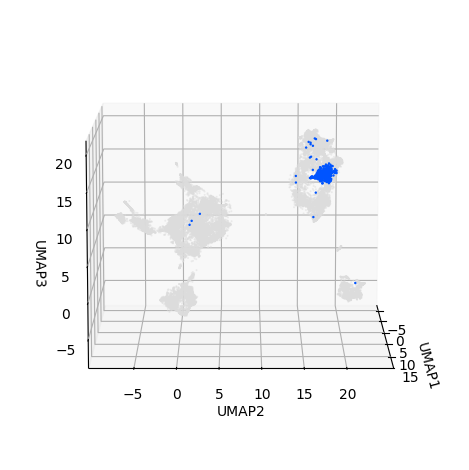

vae20 cluster 18


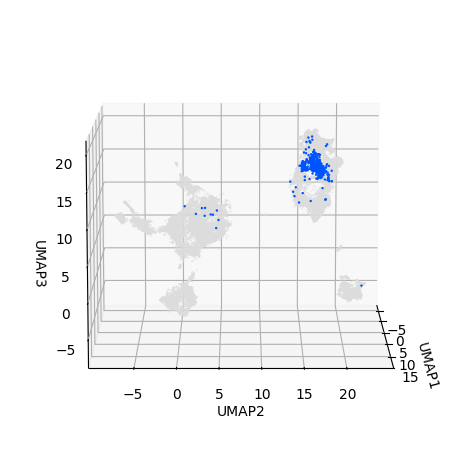

vae20 cluster 19


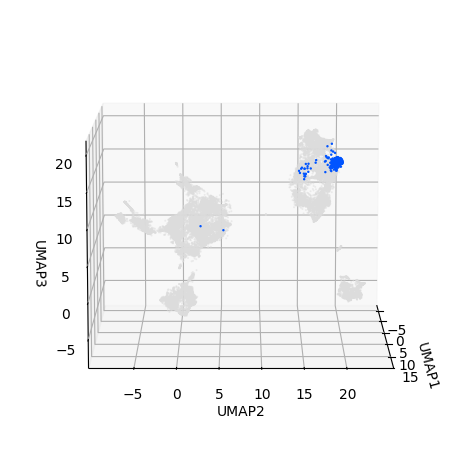

vae20 cluster 20


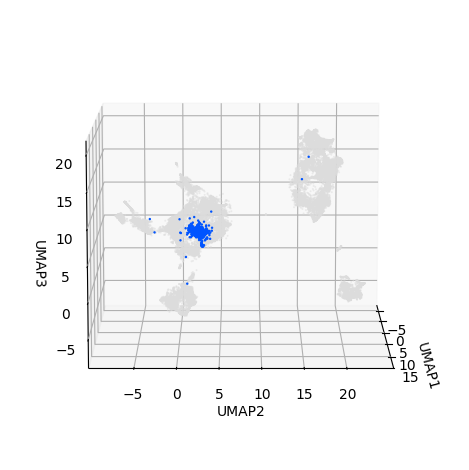

vae20 cluster 21


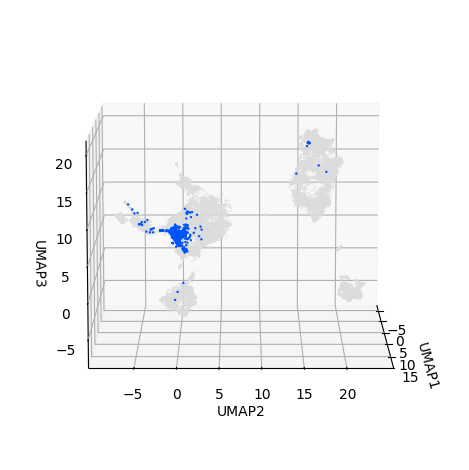

vae20 cluster 22


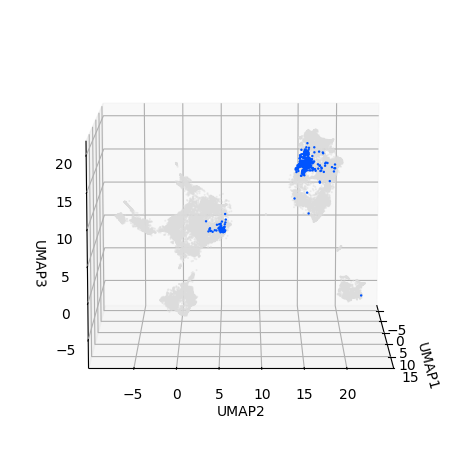

vae20 cluster 23


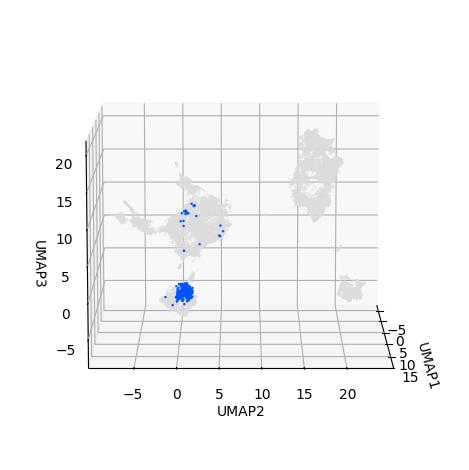

vae20 cluster 24


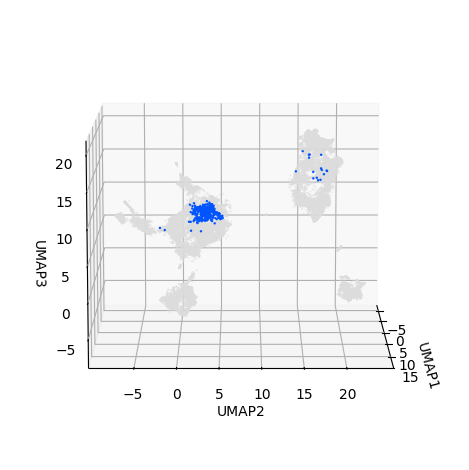

vae20 cluster 25


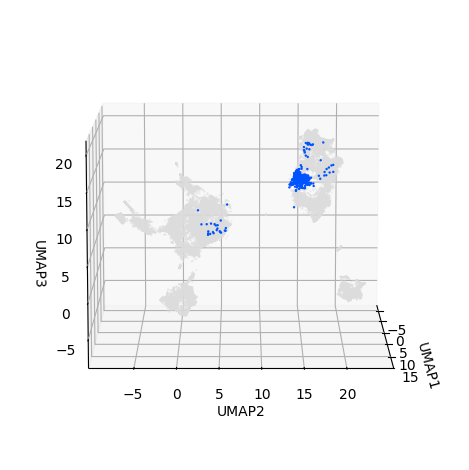

vae20 cluster 26


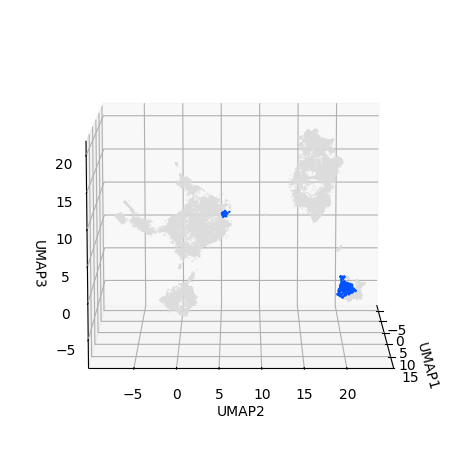

vae20 cluster 27


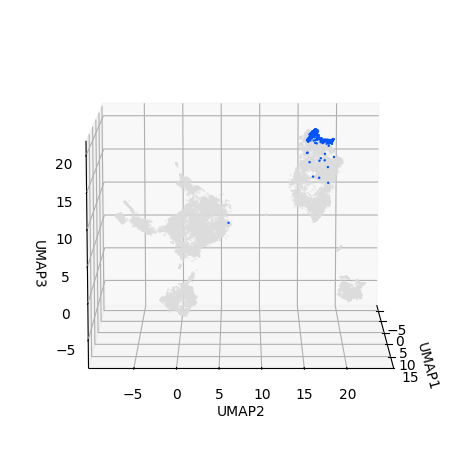

vae20 cluster 28


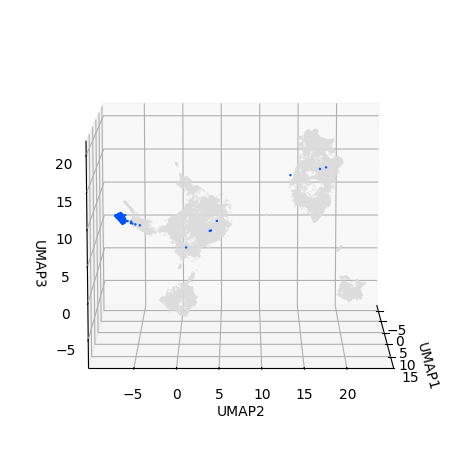

vae20 cluster 29


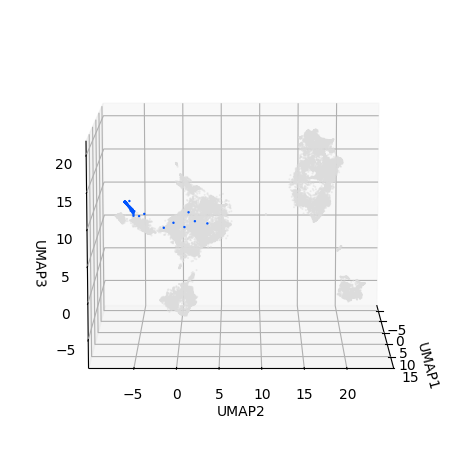

vae20 cluster 30


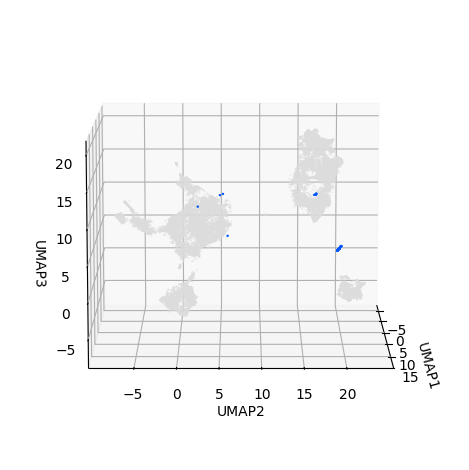

vae20 cluster 31


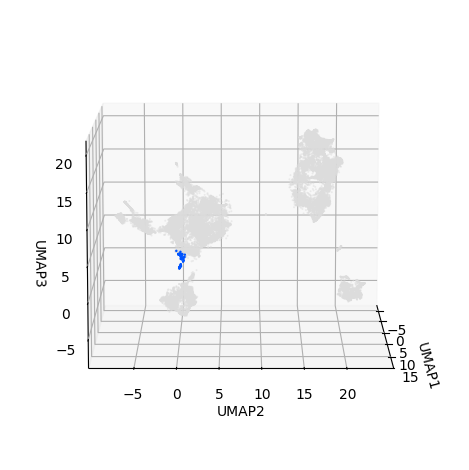

vae20 cluster 32


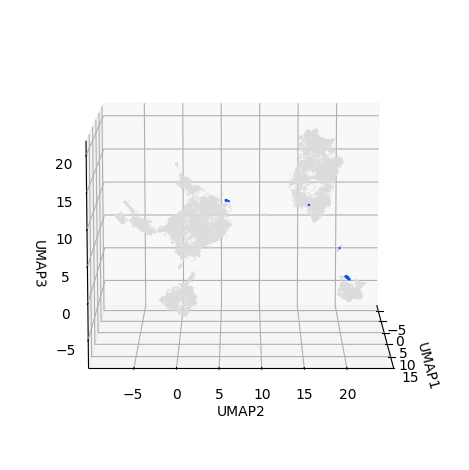

vae20 cluster 33


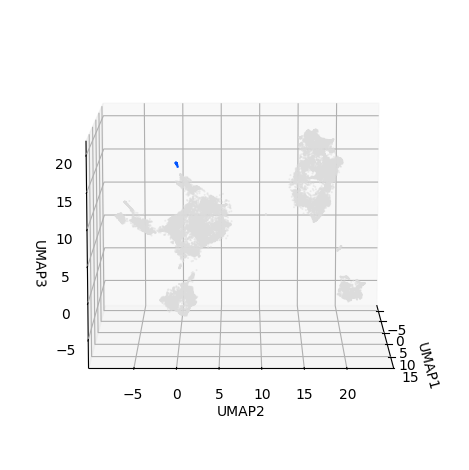

vae20 cluster 34


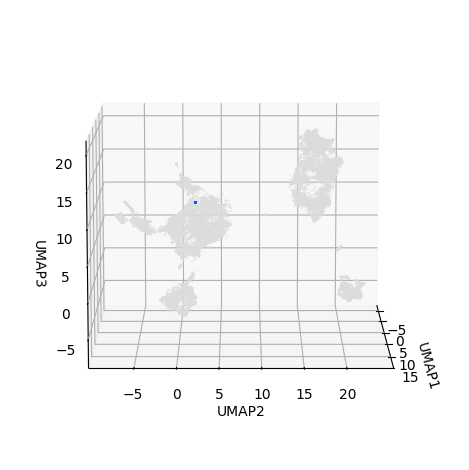

vae20 cluster 35


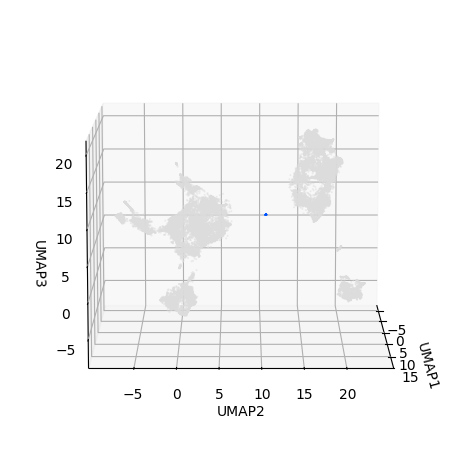

In [3]:
# plot
for name, emb, clustering in zip(
    ['seg', 'vae9', 'vae20'],
    ['seg_emb', 'VAE9_ROT_VIG18_emb_3d_', 'VAE20_emb_3d_'],
    ['Leiden', 'VAE9_ROT_VIG18', 'VAE20_Leiden'] 
    ): 

    data = main.sample(frac=0.05)
    
    for i in sorted(data[clustering].unique()):
        if i != -1:
            
            print(f'{name} cluster {i}')
            
            fig = plt.figure()
            ax = plt.axes(projection='3d', computed_zorder=False)
            
            if name == 'seg':
                ax.view_init(elev=10, azim=230)
            elif name == 'vae9':
                ax.view_init(elev=10, azim=318)
            elif name == 'vae20':
                ax.view_init(elev=10, azim=0)
                
            # if name == 'VAE9':
            ax.scatter(
                data[f'{emb}1'],
                data[f'{emb}2'],
                data[f'{emb}3'],
                c='gainsboro', linewidth=0.0, s=2, alpha=0.5
            )
            ax.scatter(
                data[f'{emb}1'][data[clustering] == i],
                data[f'{emb}2'][data[clustering] == i],
                data[f'{emb}3'][data[clustering] == i],
                color=(0, 0.33, 1), linewidth=0.0, s=3, alpha=1,
            )
            ax.set_xlabel('UMAP1')
            ax.set_ylabel('UMAP2')
            ax.set_zlabel('UMAP3')

            ax.axis('auto')
            ax.tick_params(labelsize=10)
            ax.grid(True)
            plt.tight_layout()
            
            plt.savefig(os.path.join(out, f'{name}_cluster_{i}.png'), dpi=800)
            
            plt.show()